# CH. 7 - TOPIC MODELS
## Exercises

#### Exercise 7.01: Load Libraries

In [1]:
# not necessary

# put this in to block deprecation warnings
# from pyLDAvis

import warnings
warnings.filterwarnings('ignore')

In [2]:
import langdetect  # language detection
import matplotlib.pyplot  # plotting
import nltk  # natural language processing
import numpy  # arrays and matrices
import pandas  # dataframes
import pyLDAvis  # plotting
import pyLDAvis.sklearn  # plotting
import regex  # regular expressions
import sklearn  # machine learning
import sys

/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [3]:
# installing specific word dictionarys
# used for stopword removal and lemmatization

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aaronjones/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aaronjones/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
%matplotlib inline

In [ ]:
# Exercise 7.01 Unit Test

def unittest_exercise_7_01(libs):
    for l in libs:
        if not l in sys.modules:
            raise ValueError("The {} module is not installed.".format(l))

list_libraries=["warnings", "langdetect", "matplotlib.pyplot", "nltk", "numpy", 
                "pandas", "pyLDAvis", "pyLDAvis.sklearn", "regex", "sklearn"]
unittest_exercise_7_01(libs=list_libraries)

#### Exercise 7.02: Load and Examine Data

In [6]:
# define path and load data

path = "~/Documents/packt-data/topic-model-news-final/News_Final.csv"
df = pandas.read_csv(path, header=0)

In [7]:
# define quick look function for data frame

def dataframe_quick_look(df, nrows):
    print("SHAPE:\n{shape}\n".format(shape=df.shape))
    print("COLUMN NAMES:\n{names}\n".format(names=df.columns))
    print("HEAD:\n{head}\n".format(head=df.head(nrows)))

In [8]:
dataframe_quick_look(df, nrows=2)

SHAPE:
(93239, 11)

COLUMN NAMES:
Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

HEAD:
    IDLink                                             Title  \
0  99248.0  Obama Lays Wreath at Arlington National Cemetery   
1  10423.0       A Look at the Health of the Chinese Economy   

                                            Headline     Source    Topic  \
0  Obama Lays Wreath at Arlington National Cemete...  USA TODAY    obama   
1  Tim Haywood, investment director business-unit...  Bloomberg  economy   

           PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0  2002-04-02 00:00:00        0.000000          -0.053300        -1   
1  2008-09-20 00:00:00        0.208333          -0.156386        -1   

   GooglePlus  LinkedIn  
0          -1        -1  
1          -1        -1  



In [9]:
# data set came with prespecified topics
# print the topics out with counts

print("TOPICS:\n{topics}\n".format(topics=df["Topic"].value_counts()))

TOPICS:
economy      33928
obama        28610
microsoft    21858
palestine     8843
Name: Topic, dtype: int64



In [10]:
# lets look at the final data we are going to move forward with

raw = df["Headline"].tolist()
print("HEADLINES:\n{lines}\n".format(lines=raw[:5]))
print("LENGTH:\n{length}\n".format(length=len(raw)))

HEADLINES:
['Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor', 'Tim Haywood, investment director business-unit head for fixed income at Gam, discusses the China beige book and the state of the economy.', "Nouriel Roubini, NYU professor and chairman at Roubini Global Economics, explains why the global economy isn't facing the same conditions", "Finland's economy expanded marginally in the three months ended December, after contracting in the previous quarter, preliminary figures from Statistics Finland showed Monday. ", 'Tourism and public spending continued to boost the economy in January, in light of contraction in private consumption and exports, according to the Bank of Thailand data. ']

LENGTH:
93239



In [ ]:
# Exercise 7.02 Unit Test

def unittest_exercise_7_02():
    try:
        df
    except NameError:
        print("No dataframe present.")

unittest_exercise_7_02()

#### Exercise 7.03: Step-by-step Data Cleaning

In [12]:
# select one headline to use as an example

example = raw[5]
print(example)

Over 100 attendees expected to see latest version of Microsoft Dynamics SL and Dynamics GP (PRWeb February 29, 2016) Read the full story at http://www.prweb.com/releases/2016/03/prweb13238571.htm 


In [13]:
# check language of headline
# filter to english only

def do_language_identifying(txt):
    try: the_language = langdetect.detect(txt)
    except: the_language = 'none'
    return the_language

In [14]:
print("DETECTED LANGUAGE:\n{lang}\n".format(lang=do_language_identifying(example)))

DETECTED LANGUAGE:
en



In [15]:
# tokenize the data

example = example.split(" ")
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'http://www.prweb.com/releases/2016/03/prweb13238571.htm', '']


In [16]:
# find and replace website addresses

example = [
    'URL' if bool(regex.search("http[s]?://", i)) 
    else i for i in example
]
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [17]:
# remove punctuation

example = [regex.sub("[^\\w\\s]|\n", "", i) for i in example]
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', 'PRWeb', 'February', '29', '2016', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [18]:
# remove numbers

example = [regex.sub("^[0-9]*$", "", i) for i in example]
print(example)

['Over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', 'PRWeb', 'February', '', '', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [19]:
# make everything lowercase

example = [i.lower() if i not in "URL" else i for i in example]
print(example)

['over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', 'prweb', 'february', '', '', 'read', 'the', 'full', 'story', 'at', 'URL', '']


In [20]:
# remove the url placeholder

example = [i for i in example if i not in "URL"]
print(example)

['over', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', 'prweb', 'february', 'read', 'the', 'full', 'story', 'at']


In [21]:
# remove stopwords
# uses stopwords dictionary previously loaded

list_stop_words = nltk.corpus.stopwords.words("english")
list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
print(list_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [22]:
example = [i for i in example if i not in list_stop_words]
print(example)

['attendees', 'expected', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', 'prweb', 'february', 'read', 'full', 'story']


In [23]:
# perform lemmatization
# uses wordnet dictionary previously loaded

def do_lemmatizing(wrd):
    out = nltk.corpus.wordnet.morphy(wrd)
    return (wrd if out is None else out)

In [24]:
example = [do_lemmatizing(i) for i in example]
print(example)

['attendee', 'expect', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', 'prweb', 'february', 'read', 'full', 'story']


In [25]:
# remove words less than 5 characters long

example = [i for i in example if len(i) >= 5]
print(example)

['attendee', 'expect', 'latest', 'version', 'microsoft', 'dynamics', 'dynamics', 'prweb', 'february', 'story']


In [ ]:
# Exercise 7.03 Unit Test

def unittest_exercise_7_03(predicted):
    actual = ['attendee', 'expect', 'latest', 'version', 'microsoft', 
              'dynamics', 'dynamics', 'prweb', 'february', 'story']
    assert actual == predicted, "Inputted list does not match expected list."

unittest_exercise_7_03(predicted=example)

#### Exercise 7.04: Complete Data Cleaning

In [27]:
# define consolidated data cleaning function

def do_headline_cleaning(txt):
    # identify language of tweet
    # return null if language not english
    lg = do_language_identifying(txt)
    if lg != 'en':
        return None
    
    # split the string on whitespace
    out = txt.split(" ")
    
    # identify urls
    # replace with URL
    out = ['URL' if bool(regex.search("http[s]?://", i)) else i for i in out]
    
    # remove all punctuation
    out = [regex.sub("[^\\w\\s]|\n", "", i) for i in out]
    
    # remove all numerics
    out = [regex.sub("^[0-9]*$", "", i) for i in out]
    
    # make all non-keywords lowercase
    out = [i.lower() if i not in "URL" else i for i in out]
    
    # remove URL
    out = [i for i in out if i not in "URL"]
    
    # remove stopwords
    list_stop_words = nltk.corpus.stopwords.words("english")
    list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
    
    out = [i for i in out if i not in list_stop_words]
    
    # lemmatizing
    out = [do_lemmatizing(i) for i in out]
    
    # keep words 5 or more characters long
    out = [i for i in out if len(i) >= 5]
    
    return out

In [28]:
# execute function
# takes several minutes

clean = list(map(do_headline_cleaning, raw))

In [29]:
# remove none types

clean = list(filter(None.__ne__, clean))
print("HEADLINES:\n{lines}\n".format(lines=clean[:5]))
print("LENGTH:\n{length}\n".format(length=len(clean)))

HEADLINES:
[['obama', 'wreath', 'arlington', 'national', 'cemetery', 'president', 'barack', 'obama', 'wreath', 'unknown', 'honor'], ['haywood', 'investment', 'director', 'businessunit', 'income', 'discus', 'china', 'beige', 'state', 'economy'], ['nouriel', 'roubini', 'professor', 'chairman', 'roubini', 'global', 'economics', 'explain', 'global', 'economy', 'facing', 'conditions'], ['finland', 'economy', 'expand', 'marginally', 'three', 'month', 'december', 'contracting', 'previous', 'quarter', 'preliminary', 'figure', 'statistics', 'finland', 'monday'], ['tourism', 'public', 'spending', 'continue', 'boost', 'economy', 'january', 'light', 'contraction', 'private', 'consumption', 'export', 'accord', 'thailand']]

LENGTH:
92948



In [30]:
# turn tokens back into string
# concatenate with white spaces

clean_sentences = [" ".join(i) for i in clean]

In [31]:
print(clean_sentences[0:10])

['obama wreath arlington national cemetery president barack obama wreath unknown honor', 'haywood investment director businessunit income discus china beige state economy', 'nouriel roubini professor chairman roubini global economics explain global economy facing conditions', 'finland economy expand marginally three month december contracting previous quarter preliminary figure statistics finland monday', 'tourism public spending continue boost economy january light contraction private consumption export accord thailand', 'attendee expect latest version microsoft dynamics dynamics prweb february story', 'ramallah february palestine liberation organization sectretarygeneral erekat thursday express concern kenyan president uhuru kenyattas visit jerusalem jordan valley', 'first michelle obama speak state white house washington wednesday interactive student workshop musical legacy charles student school community organization across country participate quotin performance white housequot se

In [ ]:
# Exercise 7.04 Unit Test

def unittest_exercise_7_04(predicted):
    actualCnt = 92948
    predictedCnt = len(predicted)
    assert actualCnt == predictedCnt, "List lengths not equal."

unittest_exercise_7_04(predicted=clean_sentences)

#### Exercise 7.05: Count Vectorizer

In [34]:
# define some global variables

number_words = 10
number_docs = 10
number_features = 1000

In [35]:
# execute bag of words model
# use raw term counts for lda 
# as it is a probabilistic graphical model

vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=20, 
    max_features=number_features
)
clean_vec1 = vectorizer1.fit_transform(clean_sentences)
print(clean_vec1[0])

feature_names_vec1 = vectorizer1.get_feature_names()

  (0, 572)	2
  (0, 557)	1
  (0, 643)	1
  (0, 88)	1
  (0, 407)	1


In [ ]:
# Exercise 7.05 Unit Test

def unittest_exercise_7_05(num_feats, vectorized):
    actualCnt = num_feats
    predictedCnt = len(vectorized)
    assert actualCnt == predictedCnt, "Size of count vectorizer not correct."

unittest_exercise_7_05(num_feats=number_features, vectorized=feature_names_vec1)

#### Exercise 7.06: Select Number of Topics

In [39]:
# define function to calculate perplexity for LDA model trained on ntopics

def perplexity_by_ntopic(data, ntopics):
    output_dict = {
        "Number Of Topics": [], 
        "Perplexity Score": []
    }
    
    for t in ntopics:
        lda = sklearn.decomposition.LatentDirichletAllocation(
            n_components=t,
            learning_method="online",
            random_state=0
        )
        lda.fit(data)
        
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
        
    output_df = pandas.DataFrame(output_dict)
    
    index_min_perplexity = output_df["Perplexity Score"].idxmin()
    output_num_topics = output_df.loc[
        index_min_perplexity,  # index
        "Number Of Topics"  # column
    ]
        
    return (output_df, output_num_topics)

In [40]:
# find perplexity scores for several different numbers of topics
# takes several minutes

df_perplexity, optimal_num_topics = perplexity_by_ntopic(
    clean_vec1, 
    ntopics=[1, 2, 3, 4, 6, 8, 10]
)

In [41]:
print(df_perplexity)

   Number Of Topics  Perplexity Score
0                 1        510.027194
1                 2        462.489204
2                 3        409.262083
3                 4        426.006467
4                 6        501.805279
5                 8        530.169285
6                10        580.127011


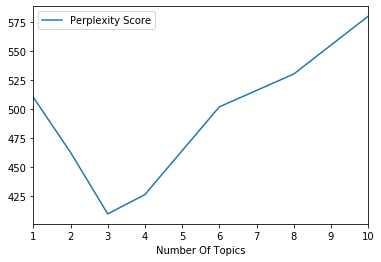

In [42]:
df_perplexity.plot.line("Number Of Topics", "Perplexity Score")

In [ ]:
# Exercise 7.06 Unit Test

def unittest_exercise_7_06(predicted):
    actual = 3
    assert actual == predicted, "Incorrect number of topics."

unittest_exercise_7_06(predicted=optimal_num_topics)

#### Exercise 7.07: Latent Dirichlet Allocation

In [44]:
# define and fit LDA model

lda = sklearn.decomposition.LatentDirichletAllocation(
    n_components=optimal_num_topics,
    learning_method="online",
    random_state=0
)
lda.fit(clean_vec1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [45]:
# output matrix
# h: docs to topics

lda_transform = lda.transform(clean_vec1)
print(lda_transform.shape)
print(lda_transform)

(92948, 3)
[[0.0481743  0.04761956 0.90420614]
 [0.64777829 0.16174437 0.19047734]
 [0.79057518 0.16247142 0.0469534 ]
 ...
 [0.30685006 0.04029243 0.6528575 ]
 [0.06985503 0.06917984 0.86096513]
 [0.20602805 0.40959865 0.3843733 ]]


In [46]:
# output matrix
# w: words to topics

lda_components = lda.components_
print(lda_components.shape)
print(lda_components)

(3, 1000)
[[3.36595777e-01 4.45005961e-01 2.09506864e+02 ... 2.31726830e+02
  1.22597909e+02 2.50395708e+00]
 [3.35637820e-01 2.72131014e+02 6.03813829e+00 ... 3.35771012e-01
  2.07927729e+02 4.13448292e-01]
 [2.74831510e+02 3.80769191e-01 3.62699704e-01 ... 3.46630689e-01
  1.72942249e+02 4.59896574e+02]]


In [47]:
# define function to reformat output matrices into easily readable tables

def get_topics(mod, vec, names, docs, ndocs, nwords):
    # word to topic matrix
    W = mod.components_
    W_norm = W / W.sum(axis=1)[:, numpy.newaxis]
    # topic to document matrix
    H = mod.transform(vec)
    
    W_dict = {}
    H_dict = {}
    
    for tpc_idx, tpc_val in enumerate(W_norm):
        topic = "Topic{}".format(tpc_idx)
        
        # formatting w
        W_indices = tpc_val.argsort()[::-1][:nwords]
        W_names_values = [
            (round(tpc_val[j], 4), names[j]) 
            for j in W_indices
        ]
        W_dict[topic] = W_names_values
        
        # formatting h
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j]) 
            for j in H_indices
        ]
        H_dict[topic] = H_names_values
        
    W_df = pandas.DataFrame(
        W_dict, 
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pandas.DataFrame(
        H_dict,
        index=["Doc" + str(i) for i in range(ndocs)]
    )
        
    return (W_df, H_df)

In [48]:
# run function

W_df, H_df = get_topics(
    mod=lda,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [49]:
# word-topic table

print(W_df)

                     Topic0                Topic1                 Topic2
Word0     (0.1007, economy)   (0.1017, microsoft)        (0.0881, obama)
Word1    (0.0346, economic)     (0.0233, windows)    (0.0764, president)
Word2      (0.0175, growth)     (0.0228, company)       (0.0439, barack)
Word3      (0.0149, global)  (0.0184, microsofts)        (0.0178, state)
Word4       (0.0116, china)    (0.0154, announce)    (0.0159, palestine)
Word5       (0.0112, world)       (0.0139, today)       (0.0137, obamas)
Word6     (0.0108, percent)     (0.0104, release)   (0.0131, washington)
Word7  (0.0106, government)    (0.0088, business)  (0.0125, palestinian)
Word8      (0.0098, market)      (0.0087, update)        (0.0113, house)
Word9     (0.0097, country)     (0.0074, surface)        (0.0104, white)


In [50]:
# document-topic table

print(H_df)

                                                 Topic0  \
Doc0  (0.9787, President Mahmoud Abbas makes proposa...   
Doc1  (0.9781, LONDON - Indonesia and the United Kin...   
Doc2  (0.9781, Microsoft Corp said on Wednesday it w...   
Doc3  (0.9781, Today, 150 Microsoft customers, devel...   
Doc4  (0.9781, When President Barack Obama's state v...   
Doc5  (0.978, People’s Bank of China Governor Zhou X...   
Doc6  (0.9779, The UK is facing a digital skills cri...   
Doc7  (0.9779, Microsoft has been on the acquisition...   
Doc8  (0.9779, Microsoft said Monday that it is buyi...   
Doc9  (0.9779, Software giant Microsoft has launched...   

                                                 Topic1  \
Doc0  (0.9776, When American presidential candidates...   
Doc1  (0.9765, &quot;We have put the utmost priority...   
Doc2  (0.9756, France's fragile economy has cooled i...   
Doc3  (0.9754, France's Palestine peace plan is part...   
Doc4  (0.9752, Patent trolls drain $1.5 billion a we...

In [ ]:
# Exercise 7.07 Unit Test

def unittest_exercise_7_07(output):
    # dimensions of output
    output_shape = output.shape
    assert (92948, 3) == output_shape, "Dimensions of output incorrect."
    
    # testing presence of W_df
    try:
        W_df
    except NameError:
        print("No W_df present.")
    
    # testing presence of H_df
    try:
        H_df
    except NameError:
        print("No H_df present.")

unittest_exercise_7_07(output=lda_transform)

#### Exercise 7.08: Visualizing LDA

In [52]:
# iterative visualization
# featuring pca biplot and histogram

lda_plot = pyLDAvis.sklearn.prepare(lda, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda_plot)

In [53]:
# define functiont to fit and plot t-SNE model

def plot_tsne(data, threshold):
    # filter data according to threshold
    index_meet_threshold = numpy.amax(data, axis=1) >= threshold
    lda_transform_filt = data[index_meet_threshold]
    
    # fit tsne model
    # x-d -> 2-d, x = number of topics
    tsne = sklearn.manifold.TSNE(
        n_components=2, 
        verbose=0, 
        random_state=0, 
        angle=0.5, 
        init='pca'
    )
    tsne_fit = tsne.fit_transform(lda_transform_filt)
    
    # most probable topic for each headline
    most_prob_topic = []
    for i in range(tsne_fit.shape[0]):
        most_prob_topic.append(lda_transform_filt[i].argmax())
    
    print("LENGTH:\n{}\n".format(len(most_prob_topic)))

    unique, counts = numpy.unique(
        numpy.array(most_prob_topic), 
        return_counts=True
    )

    print("COUNTS:\n{}\n".format(numpy.asarray((unique, counts)).T))
    
    # make plot
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i in list(set(most_prob_topic)):
        indices = [idx for idx, val in enumerate(most_prob_topic) if val == i]
        matplotlib.pyplot.scatter(
            x=tsne_fit[indices, 0], 
            y=tsne_fit[indices, 1], 
            s=0.5, 
            c=color_list[i], 
            label='Topic' + str(i),
            alpha=0.25
        )

    matplotlib.pyplot.xlabel('x-tsne')
    matplotlib.pyplot.ylabel('y-tsne')
    matplotlib.pyplot.legend(markerscale=10)

LENGTH:
57017

COUNTS:
[[    0 18239]
 [    1 15383]
 [    2 23395]]



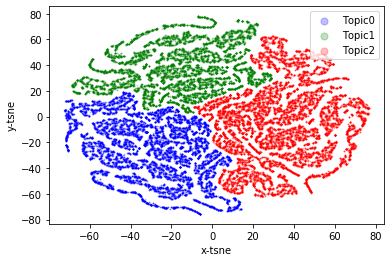

In [54]:
plot_tsne(data=lda_transform, threshold=0.75)

In [ ]:
# Exercise 7.08 Unit Test

def unittest_exercise_7_08():
    # test for presence of lda_plot
    try:
        lda_plot
    except:
        print("LDA plot did not form correctly.")

unittest_exercise_7_08()

#### Exercise 7.09: Trying 4 Topics

In [58]:
# rerun LDA model using number of topics equal to 4

lda4 = sklearn.decomposition.LatentDirichletAllocation(
    n_components=4,  # number of topics data suggests
    learning_method="online",
    random_state=0
)
lda4.fit(clean_vec1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [59]:
# run function to output raw matrices in nice table format

W_df4, H_df4 = get_topics(
    mod=lda4,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [60]:
# word-topic table

print(W_df4)

                   Topic0                Topic1                 Topic2  \
Word0   (0.1156, economy)   (0.1092, microsoft)    (0.0368, palestine)   
Word1  (0.0397, economic)      (0.025, windows)  (0.0288, palestinian)   
Word2    (0.0201, growth)     (0.0244, company)        (0.0185, state)   
Word3    (0.0171, global)  (0.0197, microsofts)       (0.0122, nation)   
Word4  (0.0136, minister)    (0.0161, announce)      (0.0116, meeting)   
Word5     (0.0135, world)     (0.0111, release)        (0.0114, issue)   
Word6     (0.0133, china)       (0.0108, today)       (0.0114, israel)   
Word7   (0.0124, percent)      (0.0094, update)    (0.0114, financial)   
Word8   (0.0108, quarter)    (0.0086, business)       (0.0108, recent)   
Word9   (0.0107, country)     (0.0079, surface)     (0.0106, thursday)   

                         Topic3  
Word0           (0.1218, obama)  
Word1       (0.1056, president)  
Word2          (0.0607, barack)  
Word3           (0.019, obamas)  
Word4      (0.0

In [61]:
# document-topic table

print(H_df4)

                                                 Topic0  \
Doc0  (0.9754, President Obama welcomed the Super Bo...   
Doc1  (0.9754, Twitter, Microsoft, Facebook and YouT...   
Doc2  (0.9747, Manifold Technology has realised the ...   
Doc3  (0.9747, Prime Minister Alexis Tsipras said Mo...   
Doc4  (0.9747, The US economy grew at an annual rate...   
Doc5  (0.9747, The Washington Post editorial board s...   
Doc6  (0.9747, An escaped political prisoner whose e...   
Doc7  (0.9747, The U.S. economy grew a revised 2% an...   
Doc8  (0.9746, (CNN) The Obama administration will a...   
Doc9  (0.9746, Obama, a featured speaker at the annu...   

                                                 Topic1  \
Doc0  (0.9749, When American presidential candidates...   
Doc1  (0.9736, France's fragile economy has cooled i...   
Doc2  (0.9727, Patent trolls drain $1.5 billion a we...   
Doc3  (0.9721, The Estonian economy was also positiv...   
Doc4  (0.9721, 2 economy could be sucked into a Japa...

In [62]:
# iteractive visualization

lda4_plot = pyLDAvis.sklearn.prepare(lda4, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda4_plot)

In [ ]:
# Exercise 7.09 Unit Test

def unittest_exercise_7_09():
    # testing presence of W_df4
    try:
        W_df4
    except NameError:
        print("No W_df4 present.")
    
    # testing presence of H_df4
    try:
        H_df4
    except NameError:
        print("No H_df4 present.")
        
    # test for presence of lda4_plot
    try:
        lda4_plot
    except:
        print("LDA4 plot did not form correctly.")

unittest_exercise_7_09()

#### Exercise 7.10: TF-IDF Vectorizer

In [65]:
# convert to bag of words model
# use tf-idf method this time

vectorizer2 = sklearn.feature_extraction.text.TfidfVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=20, 
    max_features=number_features,
    smooth_idf=False
)
clean_vec2 = vectorizer2.fit_transform(clean_sentences)
print(clean_vec2[0])

feature_names_vec2 = vectorizer2.get_feature_names()

  (0, 407)	0.6671876288988704
  (0, 88)	0.2807209598114986
  (0, 643)	0.23484180288034218
  (0, 557)	0.4665958005970176
  (0, 572)	0.4507705592116158


In [ ]:
# Exercise 7.10 Unit Test

def unittest_exercise_7_10(num_feats, vectorized):
    actualCnt = num_feats
    predictedCnt = len(vectorized)
    assert actualCnt == predictedCnt, "Size of tfidf vectorizer not correct."

unittest_exercise_7_10(num_feats=number_features, vectorized=feature_names_vec2)

#### Exercise 7.11: Non-negative Matrix Factorization

In [67]:
# define and fit nmf model

nmf = sklearn.decomposition.NMF(
    n_components=4,
    init="nndsvda",
    solver="mu",
    beta_loss="frobenius",
    random_state=0, 
    alpha=0.1, 
    l1_ratio=0.5
)
nmf.fit(clean_vec2)

NMF(alpha=0.1, beta_loss='frobenius', init='nndsvda', l1_ratio=0.5,
    max_iter=200, n_components=4, random_state=0, shuffle=False, solver='mu',
    tol=0.0001, verbose=0)

In [68]:
# run function to produce nice output tables

W_df, H_df = get_topics(
    mod=nmf,
    vec=clean_vec2,
    names=feature_names_vec2,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [69]:
# word-topic table

print(W_df)

                         Topic0              Topic1                Topic2  \
Word0           (0.0696, obama)   (0.0628, economy)    (0.087, microsoft)   
Word1       (0.0646, president)  (0.0212, economic)     (0.0306, windows)   
Word2          (0.0484, barack)    (0.0179, growth)     (0.0196, company)   
Word3      (0.0157, washington)    (0.0144, global)    (0.0162, announce)   
Word4           (0.0149, house)     (0.0127, china)  (0.0124, microsofts)   
Word5           (0.0144, white)   (0.0111, percent)      (0.0119, update)   
Word6          (0.0127, obamas)     (0.0108, world)     (0.0106, release)   
Word7           (0.0109, state)   (0.0097, quarter)         (0.01, today)   
Word8  (0.0096, administration)    (0.0092, market)     (0.0096, surface)   
Word9           (0.0081, first)   (0.0086, country)    (0.0085, software)   

                        Topic3  
Word0       (0.088, palestine)  
Word1    (0.0765, palestinian)  
Word2         (0.031, israeli)  
Word3         (0.027

In [70]:
# document-topic table

print(H_df)

                                                 Topic0  \
Doc0  (0.0845, The UK economy is steering clear of a...   
Doc1  (0.0845, The Israeli military carried out a ra...   
Doc2  (0.0845, Obama went golfing with Paulsen and N...   
Doc3  (0.0845, South Africa's economy shrank sharply...   
Doc4  (0.0845, Las Vegas air traffic is the simplest...   
Doc5  (0.0845, WASHINGTON """ Continuing his efforts...   
Doc6  (0.0845, U.S. Bank Senor Portfolio Manager Eri...   
Doc7  (0.0845, As a member of McAuliffe's Economic D...   
Doc8  (0.0845, A new economic model, which envisages...   
Doc9  (0.0845, “The possibility of two states, Israe...   

                                                 Topic1  \
Doc0  (0.0677, Brazil's economy shrank 1.7 percent i...   
Doc1  (0.0677, Jack Shao watched as his young cowork...   
Doc2  (0.0677, President Obama gave a somber denounc...   
Doc3  (0.0677, More than half of Minnesota's workfor...   
Doc4  (0.0677, President Barack Obama gives a fist b...

In [ ]:
# Exercise 7.11 Unit Test

def unittest_exercise_7_11(output):
    # testing presence of nmf model
    try:
        nmf
    except:
        print("Non-negative matrix factorization non-existent.")
    
    # testing presence of W_df
    try:
        W_df
    except NameError:
        print("No W_df present.")
    
    # testing presence of H_df
    try:
        H_df
    except NameError:
        print("No H_df present.")

unittest_exercise_7_11(output=lda_transform)

#### Exercise 7.12: Visualizing NMF

In [72]:
# output raw document-topic matrix for t-SNE plot

nmf_transform = nmf.transform(clean_vec2)
print(nmf_transform.shape)
print(nmf_transform)

(92948, 4)
[[5.12617233e-02 3.73608308e-15 2.75578334e-34 7.93397204e-16]
 [7.45030549e-04 2.03798724e-02 6.68099017e-15 2.13690261e-03]
 [2.90951586e-15 1.94132357e-02 4.55228914e-21 1.24081933e-18]
 ...
 [9.26466168e-06 3.41461778e-03 6.14054509e-04 3.23849312e-02]
 [6.38520096e-07 1.34780439e-07 3.48092631e-08 6.14097419e-02]
 [4.50847795e-05 1.16915004e-04 1.84693785e-02 2.00453398e-03]]


LENGTH:
92948

COUNTS:
[[    0 28976]
 [    1 32946]
 [    2 22147]
 [    3  8879]]



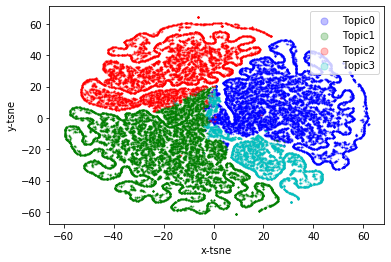

In [73]:
# run function to produce t-SNE plot

plot_tsne(data=nmf_transform, threshold=0)

In [ ]:
# Exercise 7.12 Unit Test

def unittest_exercise_7_12(output):
    # dimensions of output
    output_shape = output.shape
    assert (92948, 4) == output_shape, "Dimensions of output incorrect."

unittest_exercise_7_12(output=nmf_transform)